# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

# 2. Import Dataset

Source of Dataset: https://data.world/data-society/air-traffic-passenger-data/workspace/file?filename=Air_Traffic_Passenger_Statistics.csv

In [2]:
df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [3]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [4]:
#remove Activity_Period column because the dataset has a Year and Month column
df.drop(columns='Activity_Period', inplace= True, axis=1)

In [5]:
df

,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


# 3. Exploratory Data Analysis

### Data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Operating_Airline            15007 non-null  object
 1   Operating_Airline_IATA_Code  14953 non-null  object
 2   Published_Airline            15007 non-null  object
 3   Published_Airline_IATA_Code  14953 non-null  object
 4   GEO_Summary                  15007 non-null  object
 5   GEO_Region                   15007 non-null  object
 6   Activity_Type_Code           15007 non-null  object
 7   Price_Category_Code          15007 non-null  object
 8   Terminal                     15007 non-null  object
 9   Boarding_Area                15007 non-null  object
 10  Passenger_Count              15007 non-null  int64 
 11  Adjusted_Activity_Type_Code  15007 non-null  object
 12  Adjusted_Passenger_Count     15007 non-null  int64 
 13  Year                         15

### Data Description 

In [7]:
df.describe()

,Passenger_Count,Adjusted_Passenger_Count,Year
count,15007.000000,15007.000000,15007.000000
mean,29240.521090,29331.917105,2010.385220
std,58319.509284,58284.182219,3.137589
min,1.000000,1.000000,2005.000000
25%,5373.500000,5495.500000,2008.000000
50%,9210.000000,9354.000000,2010.000000
75%,21158.500000,21182.000000,2013.000000
max,659837.000000,659837.000000,2016.000000


In [8]:
df.describe(include='O')

,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Adjusted_Activity_Type_Code,Month
count,15007,14953,15007,14953,15007,15007,15007,15007,15007,15007,15007,15007
unique,77,73,68,64,2,9,3,2,5,8,3,12
top,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,US,Deplaned,Other,International,A,Deplaned,August
freq,2154,3046,2645,3752,9210,5797,7071,13087,9197,5225,7071,1310


### Check missing value

,missing_value,%
Operating_Airline,0,0.00
Operating_Airline_IATA_Code,54,0.36
Published_Airline,0,0.00
Published_Airline_IATA_Code,54,0.36
GEO_Summary,0,0.00
GEO_Region,0,0.00
Activity_Type_Code,0,0.00
Price_Category_Code,0,0.00
Terminal,0,0.00
Boarding_Area,0,0.00


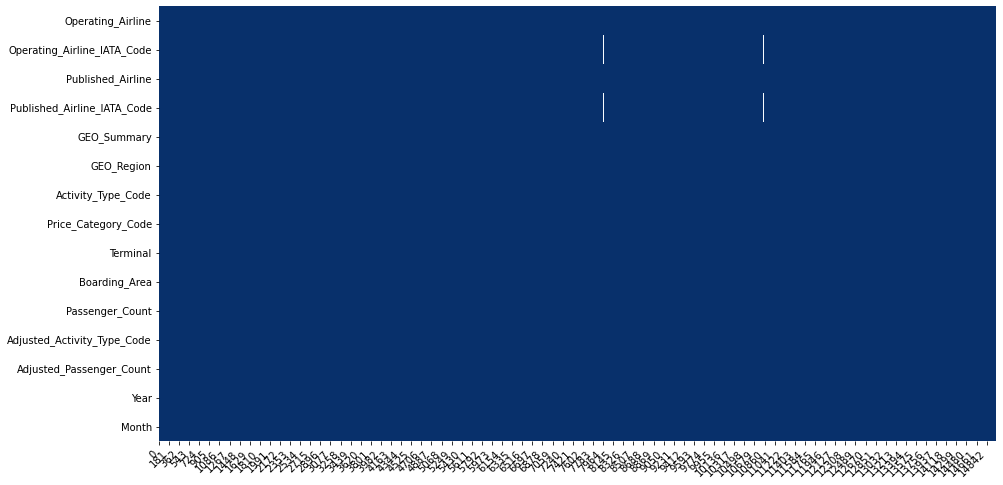

In [9]:
plot_missing_value(df, return_df= True)

In [10]:
df['Operating_Airline_IATA_Code'] = df['Operating_Airline_IATA_Code'].fillna(df['Operating_Airline_IATA_Code'].mode()[0])
df['Published_Airline_IATA_Code'] = df['Published_Airline_IATA_Code'].fillna(df['Published_Airline_IATA_Code'].mode()[0])

,missing_value,%
Operating_Airline,0,0.0
Operating_Airline_IATA_Code,0,0.0
Published_Airline,0,0.0
Published_Airline_IATA_Code,0,0.0
GEO_Summary,0,0.0
GEO_Region,0,0.0
Activity_Type_Code,0,0.0
Price_Category_Code,0,0.0
Terminal,0,0.0
Boarding_Area,0,0.0


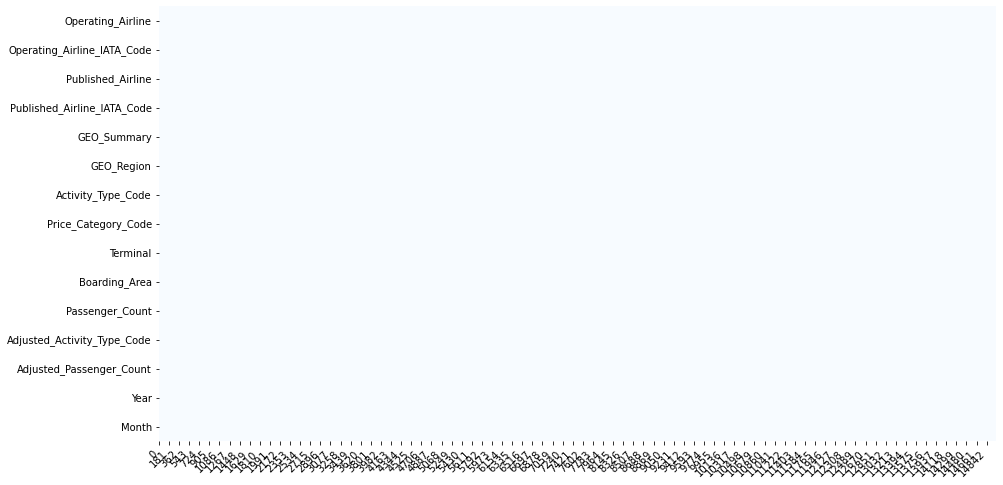

In [11]:
plot_missing_value(df, return_df= True)

`The dataset has been clean`

### Scatter Plot

#### Sum of Passenger_Count and Adjusted_Passenger_Count every year

In [12]:
a = df.groupby('Year').agg({'Passenger_Count':'sum', 'Adjusted_Passenger_Count':'sum'})
a

,Passenger_Count,Adjusted_Passenger_Count
Year,,
2005,17222033,17376629
2006,33332970,33581412
2007,35554082,35790834
2008,37234678,37402541
2009,37338942,37453634
2010,39253999,39391234
2011,40927786,41045431
2012,44399885,44477209
2013,44945760,45011764


#### Visualize Passenger_Count vs Adjusted_Passenger_Count

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


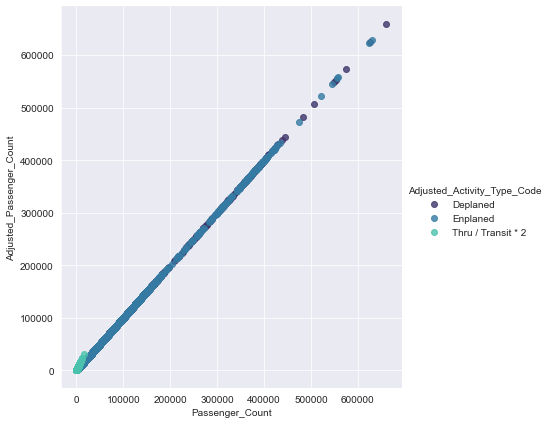

In [13]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Passenger_Count', y= 'Adjusted_Passenger_Count', data=df, hue='Adjusted_Activity_Type_Code', palette='mako',size=6,aspect=1,fit_reg=False)

### Barplot

#### Create a Barplot of Price_Category_Code vs Passenger_Count

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_Category_Code', ylabel='Passenger_Count'>

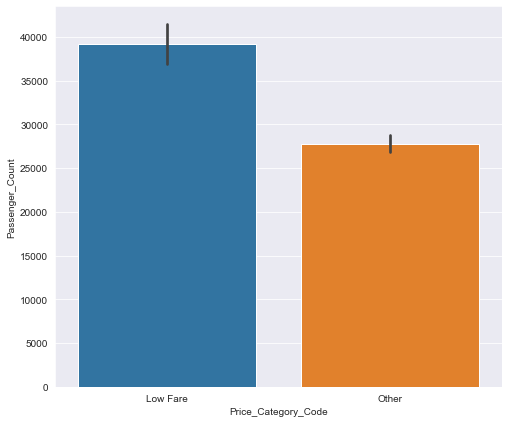

In [14]:
plt.figure(figsize=(8,7))
sns.barplot('Price_Category_Code', 'Passenger_Count', data=df)

#### Create a Barplot of Activity_Type_Code vs Passenger_Count where

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Activity_Type_Code', ylabel='Passenger_Count'>

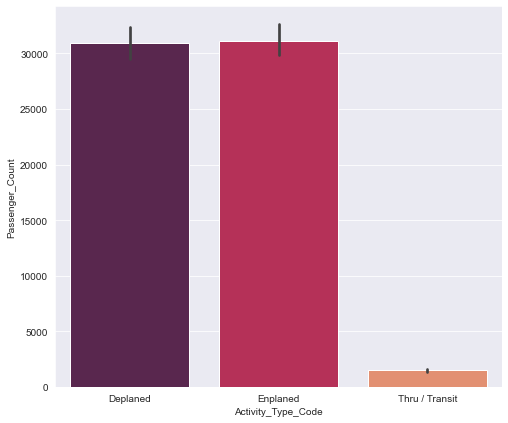

In [15]:
plt.figure(figsize=(8,7))
sns.barplot('Activity_Type_Code', 'Passenger_Count', data=df, palette='rocket')

#### Create a Barplot of GEO_Region vs Passenger_Count 

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GEO_Region', ylabel='Passenger_Count'>

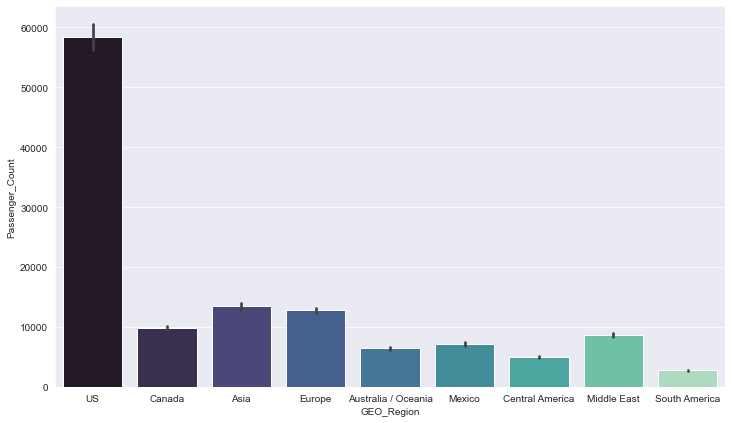

In [16]:
plt.figure(figsize=(12,7))
sns.barplot('GEO_Region', 'Passenger_Count', data=df, palette='mako')

#### Visualize the number of departures each year 

<AxesSubplot:xlabel='Year', ylabel='count'>

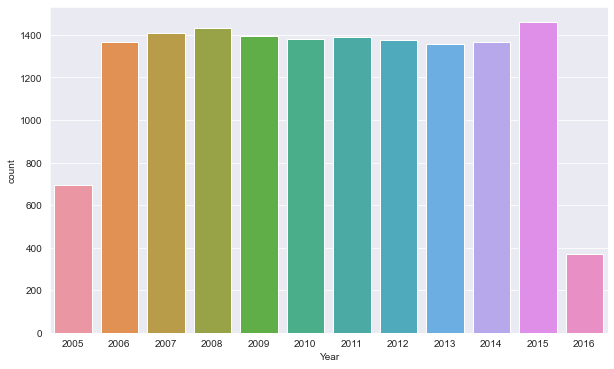

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Year', data=df)

### Stacked Histogram

#### Create a Stacked Histogram for Passenger_Count based on Price_Category_Code Column

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


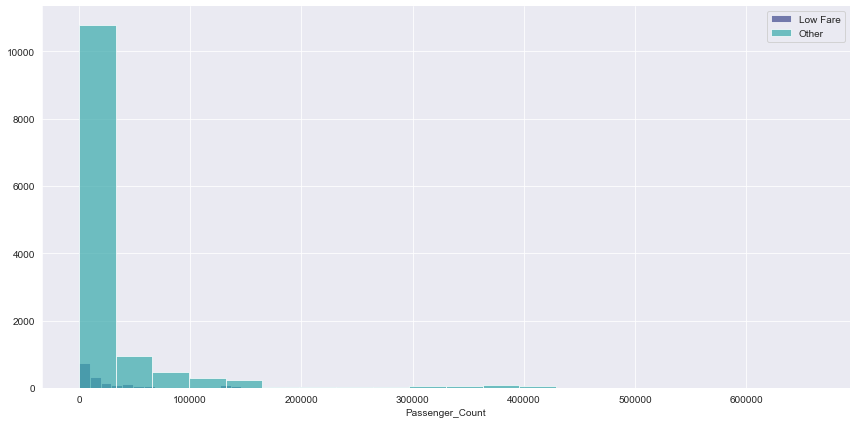

In [18]:
sns.set_style('darkgrid')
hist_plot = sns.FacetGrid(df,hue="Price_Category_Code",palette='mako',size=6,aspect=2)
hist_plot = hist_plot.map(plt.hist,'Passenger_Count',bins=20,alpha=0.7)
plt.legend()

#### Create a Stacked Histogram for Passenger_Count based on Activity_Type_Code Column

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


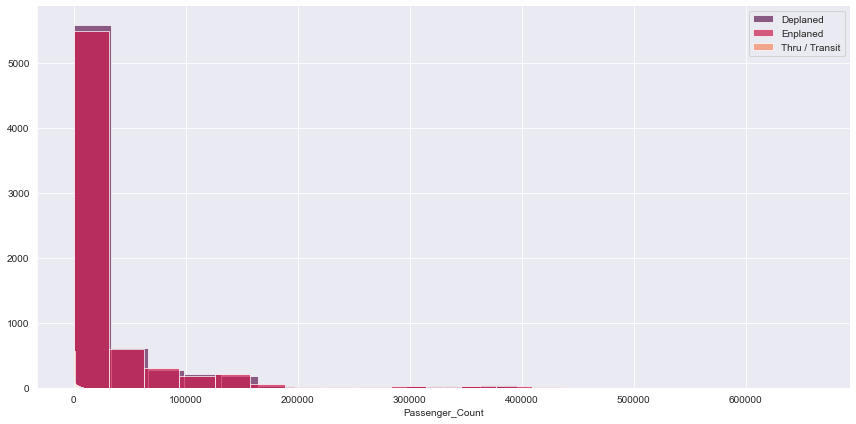

In [19]:
sns.set_style('darkgrid')
hist_plot = sns.FacetGrid(df,hue="Activity_Type_Code",palette='rocket',size=6,aspect=2)
hist_plot = hist_plot.map(plt.hist,'Passenger_Count',bins=20,alpha=0.7)
plt.legend()

#### Create a Stacked Histogram for Passenger_Count based on Price_Category_Code Column

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


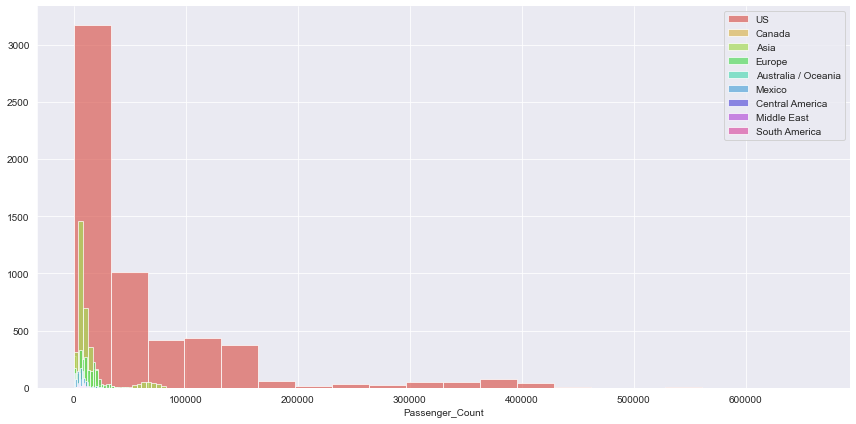

In [20]:
sns.set_style('darkgrid')
hist_plot = sns.FacetGrid(df,hue="GEO_Region",palette='hls',size=6,aspect=2)
hist_plot = hist_plot.map(plt.hist,'Passenger_Count',bins=20,alpha=0.7)
plt.legend()

# 4. Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
list_col = ['Passenger_Count','Adjusted_Passenger_Count','Year']

In [23]:
scaler = StandardScaler()
df[list_col] = scaler.fit_transform(df[list_col])

# 5. Number of Cluster with Elbow Anaysis

In [24]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

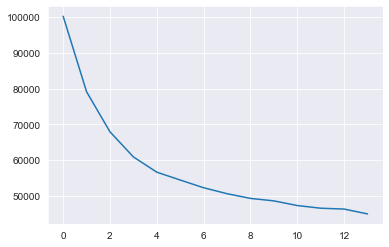

In [25]:
clust_list = []
for k in list(range(1,15)):
    clusters = KPrototypes(n_clusters=k, init='Cao')
    clusters.fit_predict(df, categorical=[0,1,2,3,4,5,6,7,8,9,11,14])
    clust_list.append(clusters.cost_)

plt.plot(clust_list)

# 6. Modeling 

In [26]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [27]:
df_array = df.values

In [28]:
kprototype = KPrototypes(n_clusters=3, verbose=2,max_iter=5)
clusters = kprototype.fit_predict(df_array, categorical=[0,1,2,3,4,5,6,7,8,9,11,14])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/5, moves: 2344, ncost: 68321.47563015964
Run: 1, iteration: 2/5, moves: 726, ncost: 68008.27784783821
Run: 1, iteration: 3/5, moves: 192, ncost: 67995.28845886566
Run: 1, iteration: 4/5, moves: 63, ncost: 67993.86970383767
Run: 1, iteration: 5/5, moves: 100, ncost: 67990.85340447328
Run: 1, iteration: 6/5, moves: 162, ncost: 67987.08506193996
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/5, moves: 3215, ncost: 68312.54361289505
Run: 2, iteration: 2/5, moves: 1125, ncost: 67963.41963209206
Run: 2, iteration: 3/5, moves: 580, ncost: 67899.13451834943
Run: 2, iteration: 4/5, moves: 56, ncost: 67898.2011475716
Run: 2, iteration: 5/5, moves: 8, ncost: 67898.15896737354
Run: 2, iteration: 6/5, moves: 0, ncost: 67898.15896737354
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/5, moves: 6

In [29]:
df_pred = df.copy()
df_pred['Clusters'] = clusters
df_pred

,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month,Clusters
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,-0.033772,Deplaned,-0.035361,-1.716413,July,0
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,-0.001878,Enplaned,-0.003447,-1.716413,July,0
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,-0.408548,Thru / Transit * 2,-0.317454,-1.716413,July,0
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,0.101436,Deplaned,0.099929,-1.716413,July,0
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,0.083156,Enplaned,0.081639,-1.716413,July,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,2.836118,Enplaned,2.836269,1.789580,March,2
15003,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,-0.429571,Deplaned,-0.431399,1.789580,March,1
15004,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,-0.420928,Enplaned,-0.422752,1.789580,March,1
15005,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,-0.290265,Deplaned,-0.292009,1.789580,March,1


In [30]:
kprototype.cluster_centroids_

[array([[-0.22078695, -0.21984321, -0.79725244],
        [-0.23889232, -0.24005104,  0.88397163],
        [ 2.88150187,  2.88168023,  0.39323996]]),
 array([['United Airlines - Pre 07/01/2013', 'UA',
         'United Airlines - Pre 07/01/2013', 'UA', 'International', 'US',
         'Deplaned', 'Other', 'International', 'A', 'Deplaned', 'August'],
        ['United Airlines', 'UA', 'United Airlines', 'UA',
         'International', 'US', 'Enplaned', 'Other', 'International', 'A',
         'Enplaned', 'February'],
        ['American Airlines', 'UA', 'United Airlines - Pre 07/01/2013',
         'UA', 'Domestic', 'US', 'Deplaned', 'Other', 'Terminal 3', 'F',
         'Deplaned', 'March']], dtype='<U32')]

# 7. Analyze the cluster

In [31]:
num,cat = kprototype.cluster_centroids_

In [32]:
df_num = pd.DataFrame(num, columns=df.columns[[10,12,13]])
df_cat = pd.DataFrame(cat, columns=df.columns[[0,1,2,3,4,5,6,7,8,9,11,14]])
df_cat.join(df_num)

,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Adjusted_Activity_Type_Code,Month,Passenger_Count,Adjusted_Passenger_Count,Year
0,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,US,Deplaned,Other,International,A,Deplaned,August,-0.220787,-0.219843,-0.797252
1,United Airlines,UA,United Airlines,UA,International,US,Enplaned,Other,International,A,Enplaned,February,-0.238892,-0.240051,0.883972
2,American Airlines,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,Deplaned,March,2.881502,2.881680,0.393240


### Cluster 1 

In [33]:
df_pred[df_pred['Clusters'] == 0]

,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month,Clusters
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,-0.033772,Deplaned,-0.035361,-1.716413,July,0
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,-0.001878,Enplaned,-0.003447,-1.716413,July,0
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,-0.408548,Thru / Transit * 2,-0.317454,-1.716413,July,0
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,0.101436,Deplaned,0.099929,-1.716413,July,0
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,0.083156,Enplaned,0.081639,-1.716413,July,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10435,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Deplaned,Other,International,G,0.599296,Deplaned,0.598091,0.514673,December,0
10437,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Deplaned,Other,International,G,-0.329755,Deplaned,-0.331523,0.514673,December,0
10439,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Deplaned,Other,Terminal 3,F,-0.279033,Deplaned,-0.280770,0.514673,December,0
10441,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Europe,Deplaned,Other,International,G,-0.177760,Deplaned,-0.179436,0.514673,December,0


### Cluster 2 

In [34]:
df_pred[df_pred['Clusters'] == 1]

,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month,Clusters
4049,US Airways,US,US Airways,US,Domestic,US,Enplaned,Other,Terminal 1,B,0.559582,Enplaned,0.558353,0.195947,March,1
4081,Mesa Airlines,YV,US Airways,US,Domestic,US,Enplaned,Other,Terminal 1,B,-0.410417,Enplaned,-0.412234,0.195947,July,1
4306,Mesa Airlines,YV,US Airways,US,Domestic,US,Enplaned,Other,Terminal 1,B,-0.432520,Enplaned,-0.434350,0.195947,October,1
4998,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 1,B,0.279581,Enplaned,0.278182,-0.441507,January,1
5005,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,-0.375693,Enplaned,-0.377489,0.514673,June,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,-0.200960,Enplaned,-0.202650,1.789580,March,1
15003,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,-0.429571,Deplaned,-0.431399,1.789580,March,1
15004,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,-0.420928,Enplaned,-0.422752,1.789580,March,1
15005,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,-0.290265,Deplaned,-0.292009,1.789580,March,1


### Cluster 3 

In [35]:
df_pred[df_pred['Clusters'] == 2]

,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month,Clusters
23,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,2.354976,Deplaned,2.354835,-1.716413,July,2
24,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,2.257458,Enplaned,2.257259,-1.716413,July,2
93,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,7.106186,Deplaned,7.108925,-1.716413,July,2
94,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,6.731445,Enplaned,6.733957,-1.716413,July,2
138,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,2.277590,Deplaned,2.277402,-1.716413,August,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14980,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,E,4.015368,Enplaned,4.016233,1.789580,March,2
14982,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,5.109035,Deplaned,5.110563,1.789580,March,2
14983,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,4.983618,Enplaned,4.985071,1.789580,March,2
15001,Virgin America,VX,Virgin America,VX,Domestic,US,Deplaned,Low Fare,Terminal 2,D,2.695988,Deplaned,2.696054,1.789580,March,2
